# import & load

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config inlineBackend.figure_format = 'retina'

In [38]:
data_path = 'https://raw.githubusercontent.com/RayleighKim/Example_datasets/master/Bike-Sharing-Dataset/hour.csv'
rides = pd.read_csv(data_path)
rides.drop(['casual','registered'], axis=1, inplace=True)
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
cnt           17379 non-null int64
dtypes: float64(4), int64(10), object(1)
memory usage: 2.0+ MB


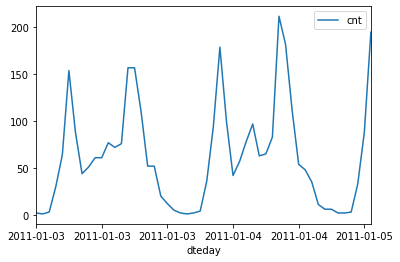

In [7]:
rides[48:100].plot(x='dteday', y='cnt')

## Q1. 출, 퇴근시간 컬럼을 만들어라

* 조건
  * 데이타를 살펴서 시간을 가리키는 컬럼을 찾음(hr)
  * 7-9 시를 출근시간이라고 함
  * 17-19시를 퇴근시간이라고 함
  * ct 라는 이름의 컬럼을 만들어 출퇴근 시간대를 표시
    * 출근시간은 1, 퇴근시간은 2, 나머지는 0

In [39]:
rides['ct'] = 0
rides.loc[rides['hr'].isin([7, 8, 9]), 'ct'] = 1
rides.loc[rides['hr'].isin([17, 18, 19]), 'ct'] = 2

In [40]:
rides.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,ct
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119,2
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89,0
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90,0
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61,0
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,49,0


## Q2. Dummy Variables

* Season, weathersit, mnth, hr, weekday 등의 category variable 들을 dummy로 만들어서 원래 데이타프레임에 붙여라

In [41]:
cat_columns = ['season', 'weathersit', 'mnth', 'hr', 'weekday']

In [48]:
new_rides = pd.concat([rides, pd.get_dummies(rides[cat_columns], columns=cat_columns, drop_first=True)], axis=1)
new_rides.drop(cat_columns, axis=1, inplace=True)
new_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 57 columns):
instant         17379 non-null int64
dteday          17379 non-null object
yr              17379 non-null int64
holiday         17379 non-null int64
workingday      17379 non-null int64
temp            17379 non-null float64
atemp           17379 non-null float64
hum             17379 non-null float64
windspeed       17379 non-null float64
cnt             17379 non-null int64
ct              17379 non-null int64
season_2        17379 non-null uint8
season_3        17379 non-null uint8
season_4        17379 non-null uint8
weathersit_2    17379 non-null uint8
weathersit_3    17379 non-null uint8
weathersit_4    17379 non-null uint8
mnth_2          17379 non-null uint8
mnth_3          17379 non-null uint8
mnth_4          17379 non-null uint8
mnth_5          17379 non-null uint8
mnth_6          17379 non-null uint8
mnth_7          17379 non-null uint8
mnth_8          17379 non-null 

In [49]:
### drop 시킬 field 들
fields_to_drop = ['instant','dteday','atemp','workingday']
new_rides.drop(fields_to_drop, axis=1, inplace=True)

In [50]:
new_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 53 columns):
yr              17379 non-null int64
holiday         17379 non-null int64
temp            17379 non-null float64
hum             17379 non-null float64
windspeed       17379 non-null float64
cnt             17379 non-null int64
ct              17379 non-null int64
season_2        17379 non-null uint8
season_3        17379 non-null uint8
season_4        17379 non-null uint8
weathersit_2    17379 non-null uint8
weathersit_3    17379 non-null uint8
weathersit_4    17379 non-null uint8
mnth_2          17379 non-null uint8
mnth_3          17379 non-null uint8
mnth_4          17379 non-null uint8
mnth_5          17379 non-null uint8
mnth_6          17379 non-null uint8
mnth_7          17379 non-null uint8
mnth_8          17379 non-null uint8
mnth_9          17379 non-null uint8
mnth_10         17379 non-null uint8
mnth_11         17379 non-null uint8
mnth_12         17379 non-null uin

## Q3. Scaling

In [51]:
scaled_col = ['temp','hum','windspeed']
for col in scaled_col:
    mean, std = new_rides[col].mean(), new_rides[col].std()
    new_rides[col] = (new_rides[col] - mean) / std

In [53]:
new_rides.head()

,yr,holiday,temp,hum,windspeed,cnt,ct,season_2,season_3,season_4,...,hr_20,hr_21,hr_22,hr_23,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,-1.334609,0.947345,-1.553844,16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,-1.438475,0.895513,-1.553844,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,-1.438475,0.895513,-1.553844,32,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,-1.334609,0.636351,-1.553844,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,-1.334609,0.636351,-1.553844,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [58]:
# splitting

test_data, val_data, train_data = new_rides[-21*24:], new_rides[-81*24:-21*24], new_rides[:-81*24]
target_fields = ['cnt']
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]
val_features, val_targets = val_data.drop(target_fields, axis=1), val_data[target_fields]
train_features, train_targets = train_data.drop(target_fields, axis=1), train_data[target_fields]

## Q4 SLR

* slr 에 linear regression 을 선언하고 학습
* 에측값 저장. train_pred, val_pred, test_pred

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
slr = LinearRegression()

slr.fit(train_features, train_targets)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
train_pred = slr.predict(train_features)
val_pred = slr.predict(val_features)
test_pred = slr.predict(test_features)

## Q5 val_targets 와 val_pred 의 RMSE를 구하라

In [63]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(val_targets, val_pred))
print(np.trunc(rmse))

123.0


## Q6 val_targets 와 val_pred 의 출근 시간대의 RMSE를 구하라

In [91]:
_tmp = val_features.reset_index(drop=True)
idx = _tmp[_tmp.ct == 1].index.to_list()

val_features2 = val_features.iloc[idx]
val_targets2 = val_targets.reset_index(drop=True).iloc[idx]

val_pred2 = slr.predict(val_features2)

rmse = np.sqrt(mean_squared_error(val_targets2, val_pred2))
print(np.trunc(rmse))


192.0


## Q7 출근시간용 Linear Regression

In [92]:
clr = LinearRegression()

In [94]:
_tmp = train_data[train_data.ct == 1]; _tmp2 = val_data[val_data.ct == 1]

train_X, train_Y = _tmp.drop(['cnt'], axis=1), _tmp['cnt']
val_X, val_Y  = _tmp2.drop(['cnt'], axis=1), _tmp2['cnt']

train_X.shape, train_Y.shape, val_X.shape, val_Y.shape


((1939, 52), (1939,), (179, 52), (179,))

In [95]:
clr.fit(train_X, train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
val_pred = clr.predict(val_X)
rmse = np.sqrt(mean_squared_error(val_Y, val_pred))
print(np.trunc(rmse))

133.0


In [97]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(train_X, train_Y)

val_pred = gbr.predict(val_X)
rmse = np.sqrt(mean_squared_error(val_Y, val_pred))
print(np.trunc(rmse))

115.0
